# Final Project Proposal

Group Members: Dev, Tejaswini, Wali, Simran



### DataSets:

https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?6B2r=FE&20=E
Flight Delays by Cause National (January, 2023 - January, 2024)
https://www.ntsb.gov/Pages/monthly.aspx
NTSB aviation accident database (January, 2023 - January, 2024)


Using data from January 2023 - January 2024

The datasets are less than 100 MB


### Hypothesis
We will be using the dataset to analyze and answer multiple hypotheses:

How does flight delay affect flight crashes
Which airlines are the safest to fly with and have the least amount of delays
Which month is the safest to fly in with the least delays?


### Responsibilities:

Data Clean up: Teja Simran

Delay analysis: Dev Teja

Crash Analysis: Wali Simran

Correlation Analysis: Wali Dev


In [1]:
!pip install geopandas
!pip install plotly==5.22.0

  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.20.0
    Uninstalling plotly-5.20.0:
      Successfully uninstalled plotly-5.20.0


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd
import plotly.express as px
import seaborn as sns
import functools

In [3]:
# https://medium.com/@anala007/float-display-in-pandas-no-more-scientific-notation-80e3dd28eabe
pd.options.display.float_format = '{:.6f}'.format
pd.set_option("display.max_columns", 40)

In [4]:
 def load_csv_files(file_paths: list[str]):
    """
    Loads csv files

    Args:
        file_paths (list[str]): file paths for csv files

    Returns:
        list[pd.DataFrame or None]: Returns list of dataframes or None if file is not found
    """
    try:
        return [pd.read_csv(file) for file in file_paths]
    except Exception as err:
        # handling exceptions like file not found or invalid format of file
        print(err)
        # returning None value for all files
        return [None for _ in file_paths]

In [5]:
df=pd.DataFrame([])
df.delay, df.crash = load_csv_files([
    "https://drive.google.com/uc?id=14WwsciHqjLg6C865bUwl7Qlap6GwCWKZ", # Airline delay information
    'https://drive.google.com/uc?id=1zj5pX1TztALbRdst-CuOBDAieL3pdz_B' # Airline crash/malfunction data
  ])

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\708554033.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.delay, df.crash = load_csv_files([


In [6]:
df.delay.head()

year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...    72.000000   5.000000   
1           Alexandria, LA: Alexandria International    62.000000   7.000000   
2        Augusta, GA: Augusta Regional at Bush Field    95.000000  10.000000   
3                   Albany, NY: Albany International    23.000000   2.000000   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...  2111.000000 256.000000   

   carrier_ct  weather_ct    nas_ct  security_ct  late_aircraft_ct  \
0    2.460000    1.000000  0.730000     0.000000          0.810000   
1    4.250000    0.000000  1.000000     0.000000          1.750000   
2    5.940000    0.000000  1.060000     0.000000          3.000000   
3    0.560000    0.000000  0.000000     0.000000          1.440000   
4   76.880000    8.750000 52.430000     0.000000        117.940000   

   arr_cancelled  arr_diverted    arr_delay  carrier_delay  weather_delay  \
0       0.000000      0.000000   672.000000      61.000000     574.000000   
1       0.000000      0.000000   348.000000     252.000000       0.000000   
2       0.000000      0.000000   859.000000     536.000000       0.000000   
3       1.000000      0.000000    75.000000       9.000000       0.000000   
4       1.000000      0.000000 21424.000000    8906.000000     732.000000   

    nas_delay  security_delay  late_aircraft_delay  
0   20.000000        0.000000            17.000000  
1   33.000000        0.000000            63.000000  
2   47.000000        0.000000           276.000000  
3    0.000000        0.000000            66.000000  
4 1487.000000        0.000000         10299.000000

In [7]:
df.crash.head()

NtsbNo EventType    Mkey             EventDate           City  \
0  CEN24LA079       ACC  193595  2023-12-31T17:40:00Z      Davenport   
1  ERA24LA084       ACC  193603  2023-12-31T16:13:00Z        Midland   
2  ERA24FA078       ACC  193581  2023-12-31T14:13:00Z    Mooresville   
3  CEN24LA077       ACC  193585  2023-12-30T17:00:00Z     Washington   
4  ERA24LA079       ACC  193587  2023-12-30T16:04:00Z  Daytona Beach   

            State        Country  ReportNo                  N#  \
0            Iowa  United States       NaN              N773GB   
1        Virginia  United States       NaN               N37GA   
2  North Carolina  United States       NaN              N539MA   
3        Missouri  United States       NaN              N678MJ   
4         Florida  United States       NaN  N828AK, FA3XNWMRAN   

           SerialNumber  HasSafetyRec      Mode     ReportType  \
0                  0702         False  Aviation            NaN   
1                 004CE         False  Aviation  DirectorBrief   
2               4692139         False  Aviation            NaN   
3              79-30941         False  Aviation            NaN   
4  1689, 163DF81001N020         False  Aviation  DirectorBrief   

  OriginalPublishedDate DocketOriginalPublishedDate HighestInjuryLevel  \
0                   NaN                         NaN                NaN   
1  2024-03-21T04:00:00Z        2024-03-21T17:00:00Z                NaN   
2                   NaN                         NaN              Fatal   
3                   NaN                         NaN            Serious   
4  2024-01-25T05:00:00Z                         NaN                NaN   

   FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0          0.000000            0.000000          0.000000   
1          0.000000            0.000000          0.000000   
2          1.000000            0.000000          0.000000   
3          0.000000            1.000000          0.000000   
4          0.000000            0.000000          0.000000   

                                       ProbableCause  ...  \
0                                                NaN  ...   
1  The pilot’s improper recovery from a bounced l...  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4  The UAS operator’s failure to operate within t...  ...   

                       Make         Model  AirCraftCategory  AirportID  \
0        CIRRUS DESIGN CORP         SR22T               AIR        DVN   
1         GOLDEN AVIO S R L      F30 Brio               AIR        HWY   
2        PIPER AIRCRAFT INC    PA46R-350T               AIR        14A   
3                  BELLANCA        17-30A               AIR        FYG   
4  ROBINSON HELICOPTER, DJI  R44, MAVIC 2    HELI, UNMANNED        DAB   

                   AirportName  AmateurBuilt NumberOfEngines EngineType  \
0                          NaN         false               1        NaN   
1           WARRENTON/FAUQUIER         false               1        REC   
2          LAKE NORMAN AIRPARK         false               1        NaN   
3          Washington Regional         false               1        NaN   
4  DAYTONA BEACH INTERNATIONAL  false, false            1, 4        REC   

  Scheduled PurposeOfFlight       FAR          AirCraftDamage  \
0       NaN            PERS       091             Substantial   
1       NaN            PERS       091             Substantial   
2       NaN            PERS       091             Substantial   
3      NSCH            PERS       091             Substantial   
4       NaN      OWRK, OWRK  091, 107  Substantial, Destroyed   

  WeatherCondition                Operator BroadPhaseofFlight ReportStatus  \
0              VMC                 JKC LLC           Approach      In work   
1              VMC                     NaN            Landing    Completed   
2              VMC        RTM AVIATION LLC            Unknown      In work   
3 

# Data Cleanup

## Airline delay Data cleaning

In [8]:
df.delay.drop_duplicates(keep=False, inplace=True) # removing duplicates

Let's check for null values

Creating a function that prints null value counts and proportion for only columns that are having null values

In [9]:
def check_null_values(df: pd.DataFrame):
    """
    Checks null values for each columns in dataframe

    Args:
        df (pd.DataFrame): Source dataframe
    """
    null_value_counts = (df.isnull().sum()).sort_values(ascending=False)
    # Removing columns that are not having null values
    null_value_counts = null_value_counts[null_value_counts != 0]
    null_value_percentages = (null_value_counts/df.shape[0]) * 100
    print("Null values for columns:\n", null_value_counts)
    print("\nNull value percentages for columns:\n", null_value_percentages)

In [10]:
check_null_values(df.delay) # checking null values for the delay dataset

Null values for columns:
 arr_del15              52
nas_ct                 47
security_ct            47
security_delay         47
nas_delay              47
weather_delay          47
carrier_delay          47
arr_delay              47
arr_diverted           47
arr_cancelled          47
late_aircraft_ct       47
late_aircraft_delay    47
weather_ct             47
carrier_ct             47
arr_flights            47
dtype: int64

Null value percentages for columns:
 arr_del15             0.229875
nas_ct                0.207772
security_ct           0.207772
security_delay        0.207772
nas_delay             0.207772
weather_delay         0.207772
carrier_delay         0.207772
arr_delay             0.207772
arr_diverted          0.207772
arr_cancelled         0.207772
late_aircraft_ct      0.207772
late_aircraft_delay   0.207772
weather_ct            0.207772
carrier_ct            0.207772
arr_flights           0.207772
dtype: float64


Since only 0.2% values are null we can drop rows containing null values

In [11]:
df.delay.dropna(inplace=True) # drop null values

In [12]:
df.delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22569 entries, 0 to 22620
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 22569 non-null  int64  
 1   month                22569 non-null  int64  
 2   carrier              22569 non-null  object 
 3   carrier_name         22569 non-null  object 
 4   airport              22569 non-null  object 
 5   airport_name         22569 non-null  object 
 6   arr_flights          22569 non-null  float64
 7   arr_del15            22569 non-null  float64
 8   carrier_ct           22569 non-null  float64
 9   weather_ct           22569 non-null  float64
 10  nas_ct               22569 non-null  float64
 11  security_ct          22569 non-null  float64
 12  late_aircraft_ct     22569 non-null  float64
 13  arr_cancelled        22569 non-null  float64
 14  arr_diverted         22569 non-null  float64
 15  arr_delay            22569 non-null  floa

In [13]:
def change_column_type(df: pd.DataFrame, mapping: dict):
    """
    Changes column data types

    Args:
        df (pd.DataFrame): source dataframe
        mapping (dict): A dict with keys mapping to target datatype and
                        value as another dicts with keys columns (a list
                        of columns that needs to be changed) and middleware
                        (Optional : a middleware function that runs before converting
                        columns to target datatype)
                        For example:
                            {
                                "int" : {
                                    "columns" : ['id']
                                    "middleware" : set_missing_id_to_zero
                                }
                            }
                        Above args will convert id column to integer but before that it will convert
                        missing ids to zero.


    Returns:
        pd.DataFrame: returns modified dataframe
    """
    try:
        for ctype, data in mapping.items():
            for column in data['columns']:
                try:
                    middleware = data.get('middleware', None)
                    df[column] = (middleware(
                        df[column]) if middleware is not None else df[column]).astype(ctype)
                except Exception as E:
                    print(f"[Error] change_column_type : Error converting column \"{column}\" to {ctype}.\n")
    except Exception as E:
        print(f"[Error] change_column_type : Error converting columns.\n")
    return df

In [14]:
def round_float_col(df: pd.DataFrame):
    """
    Round float values to nearest whole number

    Args:
        df (pd.DataFrame): source dataframe

    Returns:
        pd.DataFrame: returns modified dataframe
    """
    return df.round()

#### Now let's convert columns to target datatypes

In [15]:
df.delay = change_column_type(df.delay,{
    "category" : {
        'columns' : ['carrier', 'carrier_name', 'airport', 'airport_name']
    },
    "int" : {
        'columns' : ['arr_flights','carrier_ct', 'weather_ct','nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
        'middleware' : round_float_col
    }
    })

In [16]:
df.delay['flight_date'] = pd.to_datetime(df.delay["month"].astype(
    # creating a datetime column for flight date
    str) + "-" + df.delay["year"].astype(str))

# now using months ordering for creating month column
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
df.delay['month'] = pd.Categorical(
    df.delay['flight_date'].dt.month_name(), categories=months, ordered=True)


# now creating on time flights columns
df.delay['arr_on_time'] = df.delay['arr_flights'] - df.delay['arr_del15'] - \
    df.delay['arr_cancelled'] - df.delay['arr_diverted']

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\3651381225.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.delay['flight_date'] = pd.to_datetime(df.delay["month"].astype(


Now let's convert state codes to full name

In [17]:
def get_state_name(abb: str):
    """
    Get full name of state from the code

    Args:
        abb (str): state code

    Returns:
        str: full name of state or "Unknown" if state name is not found
    """
    abbrev2state = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TT': 'Trust Territory of the Pacific Islands',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'PR': 'Puerto Rico',
        'VI': 'Virgin Islands'
    }
    state_name = abbrev2state.get(abb.upper(), None)
    if state_name is None:
        print(f"\n[Error] get_state_name: Error converting state abbrev to name for value \"{abb}\"")
    return state_name if state_name is not None else "Unknown"

Now let's extract state and city names from airport name

In [18]:
df.delay['city'] = df.delay['airport_name'].apply(lambda a : a.split(':')[0].split(',')[0].strip())
df.delay['state'] = df.delay['airport_name'].apply(lambda a : get_state_name(a.split(':')[0].split(',')[1].strip()))

## NEW CRASH DATA CLEANING

In [19]:
df.crash.rename(columns={'Longitude ' : "Longitude"}, inplace=True) # renaming column for consistency

For this dataset we only need these columns:'EventID', 'EventType', 'EventDate', 'City', 'State', 'Country', 'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'Latitude', 'Longitude', 'AirportID', 'AirportName', 'WeatherCondition', 'Operator', 'BroadPhaseofFlight'

In [20]:
df.crash_data = df.crash.query('Country=="United States"')[
    [
    # 'RepGenFlag',
    'EventID',
    # 'ReportNo',
    # 'NtsbNo',
    'EventType',
    # 'Mkey',
    'EventDate',
    'City',
    'State',
    'Country',
    # 'N#',
    # 'SerialNumber',
    # 'HasSafetyRec',
    # 'Mode',
    # 'ReportType',
    # 'OriginalPublishedDate',
    # 'DocketOriginalPublishedDate',
    'HighestInjuryLevel',
    'FatalInjuryCount',
    'SeriousInjuryCount',
    'MinorInjuryCount',
    # 'ProbableCause',
    # 'Findings',
    'Latitude',
    'Longitude',
    # 'Make',
    # 'Model',
    # 'AirCraftCategory',
    'AirportID',
    'AirportName',
    # 'AmateurBuilt',
    # 'NumberOfEngines',
    # 'EngineType',
    # 'Scheduled',
    # 'PurposeOfFlight',
    # 'FAR',
    # 'AirCraftDamage',
    'WeatherCondition',
    'Operator',
    'BroadPhaseofFlight',
    # 'ReportStatus',
    # 'MostRecentReportType',
    # 'DocketUrl',
    # 'ReportUrl'
    ]
]

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\495376924.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.crash_data = df.crash.query('Country=="United States"')[


In [21]:
df.crash_data.drop_duplicates(keep=False, inplace=True)

In [22]:
check_null_values(df.crash_data)

Null values for columns:
 EventID               1216
Operator               711
HighestInjuryLevel     696
AirportName            453
AirportID              387
WeatherCondition        66
MinorInjuryCount        15
SeriousInjuryCount      15
FatalInjuryCount        15
Latitude                 5
Longitude                5
dtype: int64

Null value percentages for columns:
 EventID              100.000000
Operator              58.470395
HighestInjuryLevel    57.236842
AirportName           37.253289
AirportID             31.825658
WeatherCondition       5.427632
MinorInjuryCount       1.233553
SeriousInjuryCount     1.233553
FatalInjuryCount       1.233553
Latitude               0.411184
Longitude              0.411184
dtype: float64


In [23]:
df.crash_data.drop(columns=['EventID', "Country"], inplace=True)

In [24]:
check_null_values(df.crash_data)

Null values for columns:
 Operator              711
HighestInjuryLevel    696
AirportName           453
AirportID             387
WeatherCondition       66
FatalInjuryCount       15
SeriousInjuryCount     15
MinorInjuryCount       15
Latitude                5
Longitude               5
dtype: int64

Null value percentages for columns:
 Operator             58.470395
HighestInjuryLevel   57.236842
AirportName          37.253289
AirportID            31.825658
WeatherCondition      5.427632
FatalInjuryCount      1.233553
SeriousInjuryCount    1.233553
MinorInjuryCount      1.233553
Latitude              0.411184
Longitude             0.411184
dtype: float64


Dropping rows having null values in columns 'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'Latitude', 'Longitude'.

In [25]:
def fill_null_values(dataframe: pd.DataFrame, replacement: dict):
    """
    Fills null values in  multiple columns at same time

    Args:
        dataframe (pd.DataFrame): target dataframe
        replacement (dict): dictionary of replecement with column name as key and target cell value as value

    Returns:
        pd.DataFrame: new dataframe with replaced value
    """
    return dataframe.fillna(value=replacement)

In [26]:
df.crash_data.dropna(subset=['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'Latitude', 'Longitude'], inplace=True)

check_null_values(df.crash_data)

Null values for columns:
 Operator              705
HighestInjuryLevel    680
AirportName           438
AirportID             378
WeatherCondition       53
dtype: int64

Null value percentages for columns:
 Operator             58.798999
HighestInjuryLevel   56.713928
AirportName          36.530442
AirportID            31.526272
WeatherCondition      4.420350
dtype: float64


Filling null values for other columns

In [27]:
df.crash_data = fill_null_values(df.crash_data, {
    "Operator": "UNKNOWN",
    "HighestInjuryLevel": "UNKNOWN",
    "WeatherCondition": "UNK",
    "AirportName" : "Unknown",
    "AirportID" : "UNK"

})

check_null_values(df.crash_data)

Null values for columns:
 Series([], dtype: int64)

Null value percentages for columns:
 Series([], dtype: float64)


In [28]:
df.crash_data.dtypes

EventType              object
EventDate              object
City                   object
State                  object
HighestInjuryLevel     object
FatalInjuryCount      float64
SeriousInjuryCount    float64
MinorInjuryCount      float64
Latitude              float64
Longitude             float64
AirportID              object
AirportName            object
WeatherCondition       object
Operator               object
BroadPhaseofFlight     object
dtype: object

Changing data types for columns

In [29]:
df.crash_data = change_column_type(df.crash_data, {
    'int' : {
        'columns' : ['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']
    },
    'category' : {
        'columns' : ['EventType', 'HighestInjuryLevel', 'AirportID', 'WeatherCondition', 'BroadPhaseofFlight' ]
    }
})
df.crash_data.head()

EventType             EventDate           City           State  \
0       ACC  2023-12-31T17:40:00Z      Davenport            Iowa   
1       ACC  2023-12-31T16:13:00Z        Midland        Virginia   
2       ACC  2023-12-31T14:13:00Z    Mooresville  North Carolina   
3       ACC  2023-12-30T17:00:00Z     Washington        Missouri   
4       ACC  2023-12-30T16:04:00Z  Daytona Beach         Florida   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0            UNKNOWN                 0                   0                 0   
1            UNKNOWN                 0                   0                 0   
2              Fatal                 1                   0                 0   
3            Serious                 0                   1                 0   
4            UNKNOWN                 0                   0                 0   

   Latitude  Longitude AirportID                  AirportName  \
0 41.610278 -90.588361       DVN                      Unknown   
1 38.586285 -77.710631       HWY           WARRENTON/FAUQUIER   
2 35.624637 -80.912255       14A          LAKE NORMAN AIRPARK   
3 38.587583 -90.993806       FYG          Washington Regional   
4 29.163165 -81.078240       DAB  DAYTONA BEACH INTERNATIONAL   

  WeatherCondition                Operator BroadPhaseofFlight  
0              VMC                 JKC LLC           Approach  
1              VMC                 UNKNOWN            Landing  
2              VMC        RTM AVIATION LLC            Unknown  
3              VMC               PIASA LLC      Initial Climb  
4              VMC  Tunica Helicopters LLC           Approach

Converting EventDate column to datetime format

In [30]:
df.crash_data['EventDate'] = pd.to_datetime(
    df.crash_data['EventDate'], errors='coerce'
)

check_null_values(df.crash_data)
df.crash_data.dropna(inplace=True)

Null values for columns:
 Series([], dtype: int64)

Null value percentages for columns:
 Series([], dtype: float64)


Extracting year and month from EventDate column

In [31]:
df.crash_data['Year'] = df.crash_data['EventDate'].dt.year.astype(int)
df.crash_data['Month'] = pd.Categorical(df.crash_data['EventDate'].dt.month_name(), categories=months, ordered=True)
df.crash_data.head()

EventType                 EventDate           City           State  \
0       ACC 2023-12-31 17:40:00+00:00      Davenport            Iowa   
1       ACC 2023-12-31 16:13:00+00:00        Midland        Virginia   
2       ACC 2023-12-31 14:13:00+00:00    Mooresville  North Carolina   
3       ACC 2023-12-30 17:00:00+00:00     Washington        Missouri   
4       ACC 2023-12-30 16:04:00+00:00  Daytona Beach         Florida   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0            UNKNOWN                 0                   0                 0   
1            UNKNOWN                 0                   0                 0   
2              Fatal                 1                   0                 0   
3            Serious                 0                   1                 0   
4            UNKNOWN                 0                   0                 0   

   Latitude  Longitude AirportID                  AirportName  \
0 41.610278 -90.588361       DVN                      Unknown   
1 38.586285 -77.710631       HWY           WARRENTON/FAUQUIER   
2 35.624637 -80.912255       14A          LAKE NORMAN AIRPARK   
3 38.587583 -90.993806       FYG          Washington Regional   
4 29.163165 -81.078240       DAB  DAYTONA BEACH INTERNATIONAL   

  WeatherCondition                Operator BroadPhaseofFlight  Year     Month  
0              VMC                 JKC LLC           Approach  2023  December  
1              VMC                 UNKNOWN            Landing  2023  December  
2              VMC        RTM AVIATION LLC            Unknown  2023  December  
3              VMC               PIASA LLC      Initial Climb  2023  December  
4              VMC  Tunica Helicopters LLC           Approach  2023  December

# Let's check monthwise delays and crashes

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2451086314.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _=sns.barplot(((df.delay.groupby('month')['arr_del15'].sum() / df.delay.groupby('month')['arr_flights'].sum()) * 100).reset_index(name="delayed_flights").sort_values(by='month'), x='month', y='delayed_flights', label='Delays', ax=axs[0], color="Yellow")
C:\Users\devdp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2451086314.py:5: FutureWarning: The default of 

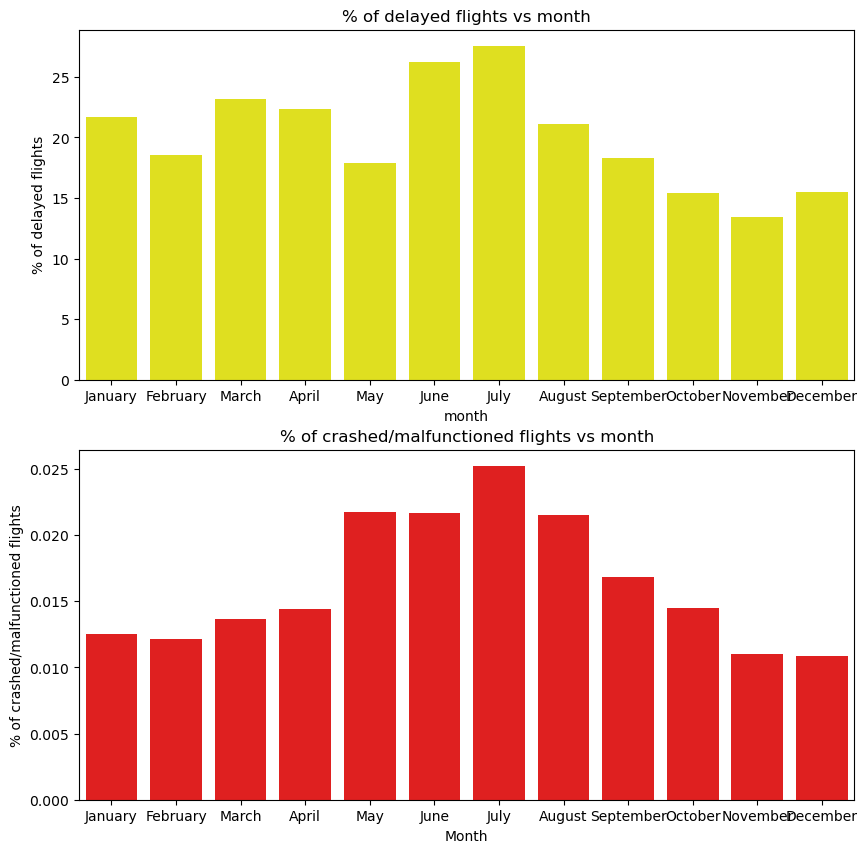

In [32]:
fig, axs =plt.subplots(2,1,figsize=(10,10))
_=sns.barplot(((df.delay.groupby('month')['arr_del15'].sum() / df.delay.groupby('month')['arr_flights'].sum()) * 100).reset_index(name="delayed_flights").sort_values(by='month'), x='month', y='delayed_flights', label='Delays', ax=axs[0], color="Yellow")
_=axs[0].set_title('% of delayed flights vs month')
_=axs[0].set(ylabel='% of delayed flights')
_=sns.barplot(((df.crash_data.groupby('Month').size() / df.delay.groupby('month')['arr_flights'].sum()) * 100).reset_index(name='incidents'), x='Month', y='incidents', label='Crashes / Malfunctions',ax=axs[1], color='Red')
_=axs[1].set_title('% of crashed/malfunctioned flights vs month')
_=axs[1].set(ylabel='% of crashed/malfunctioned flights')
plt.show()

In [33]:
def plot_monthly_delay_types(df: pd.DataFrame, delay_types: list[str]):
    """
    Plot monthly delays by delay types

    Args:
        df (pd.DataFrame): source dataframe
        delay_types (list[str]): list of delay types
    """
    try:
      monthly_delays = df.groupby('month')[delay_types].sum()

      # Plotting the stacked bar chart
      monthly_delays.plot(kind='bar', stacked=True, figsize=(12, 8))

      # Adding titles and labels
      plt.title('Monthly Delays by Type')
      plt.xlabel('Month')
      plt.ylabel('Delay Minutes')
      plt.legend(title='Delay Type')
      plt.xticks(rotation=0)

      # Display the plot
      plt.show()
    except Exception as E:
        print(f"[Error] plot_monthly_delay_types : Error plotting monthly delays.\n")

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2621775793.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_delays = df.groupby('month')[delay_types].sum()


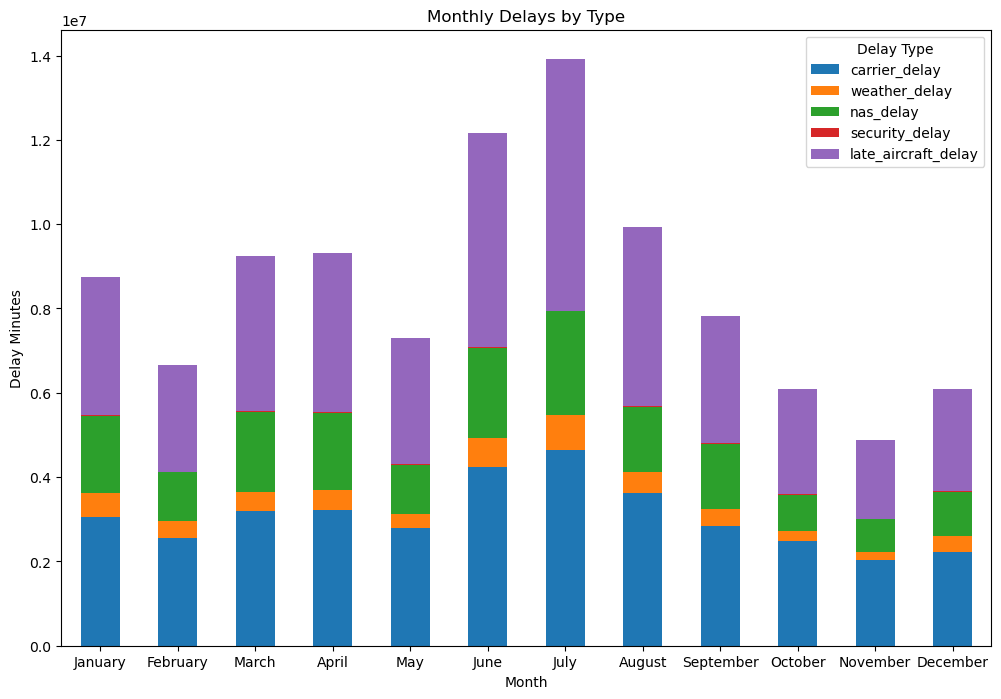

In [34]:
plot_monthly_delay_types(df.delay, ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])

- The summer months, particularly June and July, show the highest total delay minutes. This indicates significant operational challenges due to increased travel demand during this period, resulting in more delays.
- Late Aircraft Delay: This refers to delay caused due to airport related delays. This is the largest contributor to total delay minutes across all months, with the highest peaks in June and July.
- Carrier Delay: This refers to delays caused due to Airplane maintainence like refueling, cleaning or staff related delays The second-largest contributor, showing a relatively steady pattern but with noticeable increases in summer months.

- Since late aircraft delays are the largest contributor, efforts should be directed towards improving aircraft turnaround times and scheduling buffers to reduce cascading delays.

In [35]:
def plot_pie_chart(data, title):
    """
     Function to plot pie chart

    Args:
        data (_type_): pd.Series
        title (_type_): title for the chart
    """
    try:
      plt.figure(figsize=(10, 8))
      data.plot(kind='pie', autopct='%1.1f%%', startangle=180)
      plt.title(title)
      plt.ylabel('')
      plt.show()
    except Exception as E:
        print(f"[Error] plot_pie_chart : Error plotting pie chart.\n")

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\3381320962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_delays = df.delay.groupby('carrier_name')[['carrier_delay', 'late_aircraft_delay']].sum()


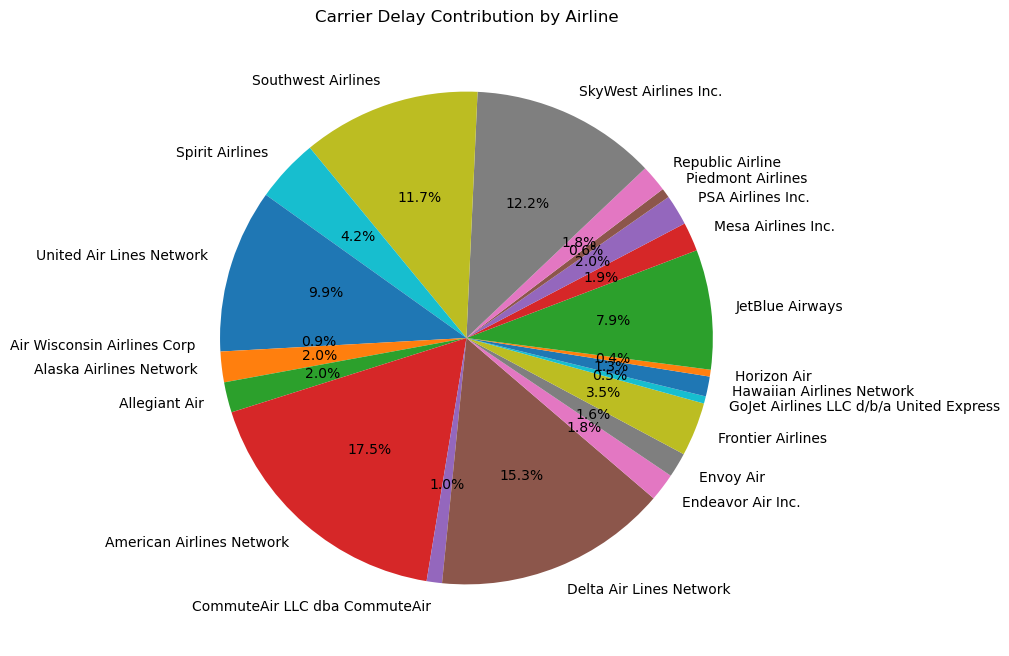

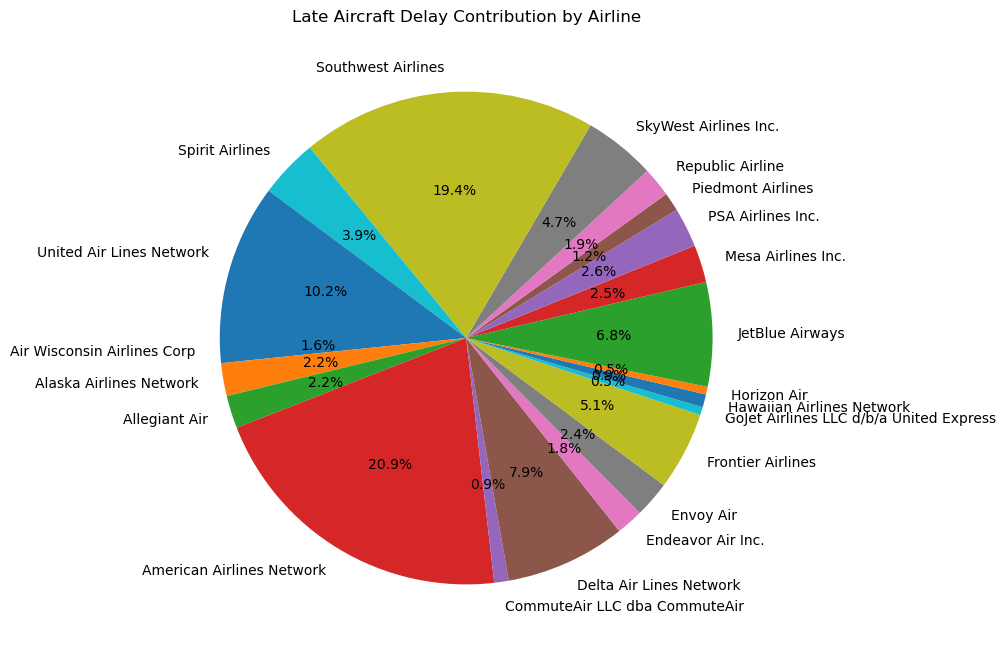

In [36]:
carrier_delays = df.delay.groupby('carrier_name')[['carrier_delay', 'late_aircraft_delay']].sum()

# Plotting pie chart for carrier_delay
plot_pie_chart(carrier_delays['carrier_delay'], 'Carrier Delay Contribution by Airline')

# Plotting pie chart for late_aircraft_delay
plot_pie_chart(carrier_delays['late_aircraft_delay'], 'Late Aircraft Delay Contribution by Airline')

Based on the above chart analyzing which airline companies contribute mostly to Carrier Delay, and Late Aircraft Delay.   
Carrier Delay Contribution by Airline
- American Airlines Network: Accounts for 17.5% of carrier delays, Delta Air Lines Network: Contributes 15.3% of carrier delays., SkyWest Airlines Inc.: Accounts for 12.2% of carrier delays, and Southwest Airlines: Contributes 11.7% of carrier delays
Late Aircraft Delay Contribution by Airline
- American Airlines Network: Contributes 20.9% of late aircraft delays, the highest among all airlines, Southwest Airlines: Accounts for 19.4% of late aircraft delays, United Air Lines Network: Responsible for 10.2% of late aircraft delays, and Delta Air Lines Network: Contributes 7.9% of late aircraft delays.


- American and Southwest as a major contributor to both carrier and late aircraft delays, American Airlines should conduct a detailed analysis to identify the root causes of delays and implement targeted strategies to improve operational efficiency.
- Specific training modules should be created to avoid delays related to airplane.
- Airlines with lower delay contributions, such as Alaska Airlines Network and Hawaiian Airlines Network, could share best practices with other carriers to help improve overall industry performance.
- Work closely with airports and air traffic control (ATC) to streamline operations and reduce bottlenecks that contribute to delays. Enhanced coordination and communication can lead to smoother operations.

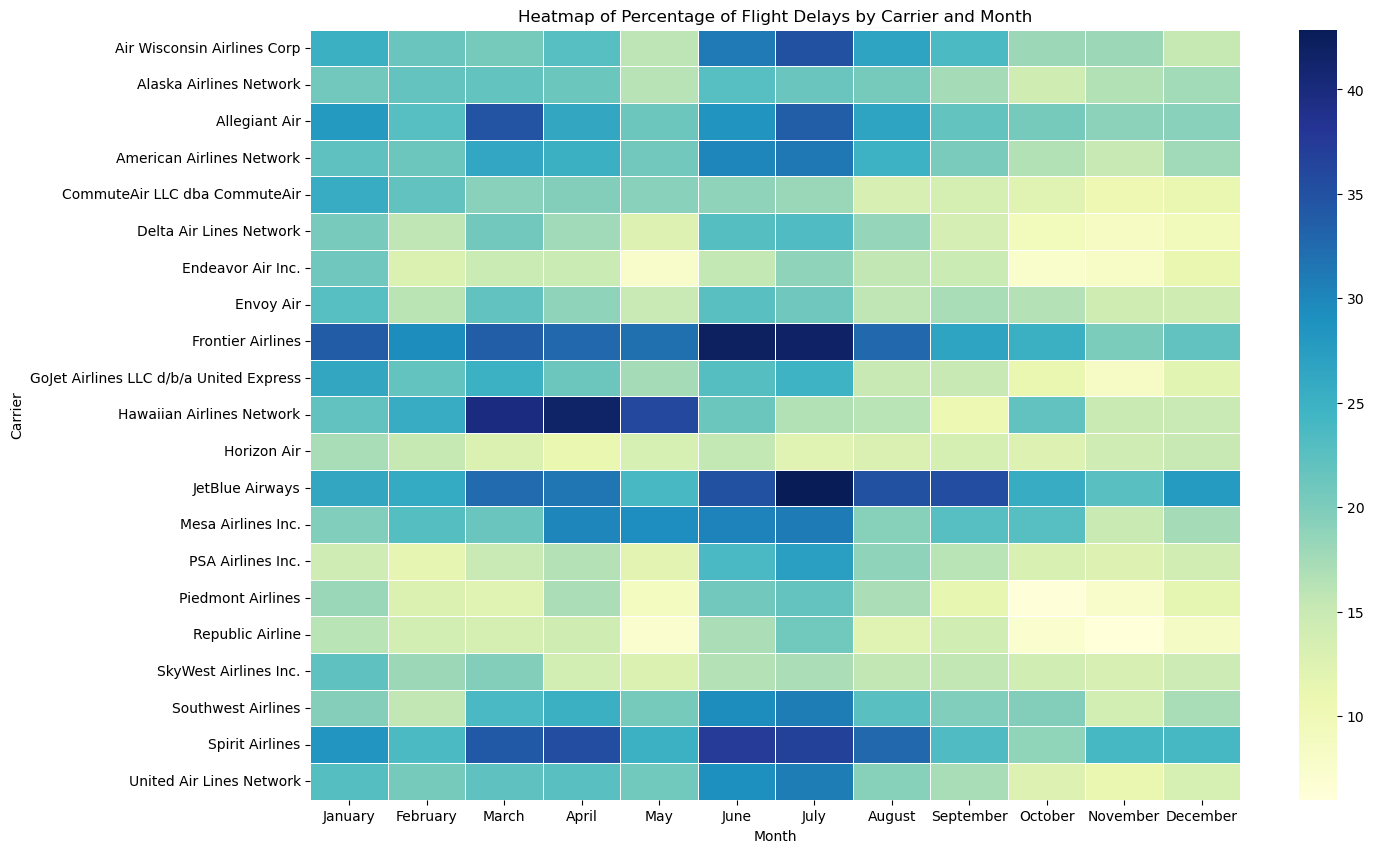

In [37]:
def plot_delay_heatmap(df: pd.DataFrame):
    """
    Plots a heatmap of the percentage of flight delays by carrier and month

    Args:
        df (pd.DataFrame): Source dataframe containing delay and flight information
    """
    try:
        # Creating pivot tables for delay and total flights
        delay_heatmap_data = df.pivot_table(
            index='carrier_name',
            columns='month',
            values='arr_del15',
            aggfunc='sum'
        )

        delay_total_flights_data = df.pivot_table(
            index='carrier_name',
            columns='month',
            values='arr_flights',
            aggfunc='sum'
        )

        # Plotting heatmap
        plt.figure(figsize=(15, 10))
        sns.heatmap((delay_heatmap_data / delay_total_flights_data) * 100, cmap='YlGnBu', linewidths=.5)
        plt.title('Heatmap of Percentage of Flight Delays by Carrier and Month')
        plt.xlabel('Month')
        plt.ylabel('Carrier')
        plt.show()
    except Exception as E:
        print(f"[Error] plot_delay_heatmap : Error plotting heatmap. {E}")

#Calling the function
plot_delay_heatmap(df.delay)


- There are noticeable variations in flight delay percentages across different months. Some carriers show higher delays in specific months, indicating potential seasonal impacts or operational challenges during those periods.

- Based on the above data people can choose airlines which has caused least amount of delay in their intended month of travel. This can help them to choose the best possible option available

In [38]:
def get_top_carriers(df: pd.DataFrame, num_of_flights=10000):
    """
    Get top carriers data

    Args:
        df (pd.DataFrame): source dataframe
        num_of_flights (int, optional): Threshold value for average num of flights per month. Defaults to 10000.

    Returns:
        pd.DataFrame : filtered dataframe having top carriers
        list : list of top carriers
    """
    # first count monthly flights for all carriers
    carrier_monthly_flights = df.groupby(['carrier_name', 'month'])[
        'arr_flights'].sum().reset_index(name="flights")

    # fing avg of monthly flights for all carriers
    carrier_monthly_flights_avg = carrier_monthly_flights.groupby('carrier_name')['flights'].mean(
    ).reset_index(name="avg_monthly_flights").sort_values(by='avg_monthly_flights', ascending=False)

    # take only those carriers with avg flights per month is greater or equals to num_of_flights
    top_carriers = carrier_monthly_flights_avg.query(
        f'avg_monthly_flights >= {num_of_flights}')['carrier_name'].values.to_list()

    # create a new dataframe
    top_carriers_data = df.loc[df['carrier_name'].isin(
        top_carriers)]

    # convert carrier_name to string
    top_carriers_data['carrier_name'] = top_carriers_data['carrier_name'].astype(
        str)

    return top_carriers_data, top_carriers

In [39]:
top_carriers_data, top_carriers = get_top_carriers(df.delay)

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\1018672275.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_monthly_flights = df.groupby(['carrier_name', 'month'])[
C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\1018672275.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_monthly_flights_avg = carrier_monthly_flights.groupby('carrier_name')['flights'].mean(
C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\1018672275.py:23: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  f'avg_monthly_flights >= {num_of_flights}')['c

In [40]:
def carrier_time_punctuality(top_carriers_data: pd.DataFrame):
    """
    Prints carrier punctuality information

    Args:
        top_carriers_data (pd.DataFrame): source dataframe

    Returns:
        pandas.io.formats.style.Styler : styled table with gradient
    """
    carrier_time_punctuality_info = top_carriers_data.groupby(['month', 'carrier_name'])['arr_on_time'].sum(
    ).unstack() / top_carriers_data.groupby(['month', 'carrier_name'])['arr_flights'].sum().unstack()

    print(f"On time flight percentages for airline per month :\n")

    return (carrier_time_punctuality_info *
            100).style.background_gradient(cmap='Greens', axis=None)

In [41]:
carrier_time_punctuality(top_carriers_data)

On time flight percentages for airline per month :



C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2416223081.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_time_punctuality_info = top_carriers_data.groupby(['month', 'carrier_name'])['arr_on_time'].sum(
C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2416223081.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).unstack() / top_carriers_data.groupby(['month', 'carrier_name'])['arr_flights'].sum().unstack()


From above data we can check the punctuality of airlines during timeline

- low numbers (light color values) means less number of on time flights for that airline compared to others
- high numbers (dark color values) means high number of on time flights
for that airline compared to others

Obervations:
- Jetblue, Frontier and Spirit airlines are consistently having less number of on time flights hence their delay rates are higher.

- Delta, Endeavor, PSA and Republic airlines are having less number of delayed filgtes compared to others

- June and July months are having high number of delayed flights for all carriers

In [42]:
carrier_on_time_stats_per_month =  top_carriers_data.groupby(['month', 'carrier_name'])['arr_on_time'].sum() / top_carriers_data.groupby(['month', 'carrier_name'])['arr_flights'].sum()
carrier_on_time_avg = carrier_on_time_stats_per_month.reset_index(name='value').groupby(['carrier_name'])['value'].mean()
(carrier_on_time_avg * 100).reset_index(name="monthly_avg_of_ontime_flights_percentages").style.background_gradient(cmap='Blues', axis=None)

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2410957949.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_on_time_stats_per_month =  top_carriers_data.groupby(['month', 'carrier_name'])['arr_on_time'].sum() / top_carriers_data.groupby(['month', 'carrier_name'])['arr_flights'].sum()
C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\2410957949.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_on_time_stats_per_month =  top_carriers_data.groupby(['month', 'carrier_name'])['arr_on_time'].sum() / top_carriers_data.groupby(['month', 'carrier_name'])['arr_flights'].sum()


In [43]:
df.crash_data.head()

EventType                 EventDate           City           State  \
0       ACC 2023-12-31 17:40:00+00:00      Davenport            Iowa   
1       ACC 2023-12-31 16:13:00+00:00        Midland        Virginia   
2       ACC 2023-12-31 14:13:00+00:00    Mooresville  North Carolina   
3       ACC 2023-12-30 17:00:00+00:00     Washington        Missouri   
4       ACC 2023-12-30 16:04:00+00:00  Daytona Beach         Florida   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0            UNKNOWN                 0                   0                 0   
1            UNKNOWN                 0                   0                 0   
2              Fatal                 1                   0                 0   
3            Serious                 0                   1                 0   
4            UNKNOWN                 0                   0                 0   

   Latitude  Longitude AirportID                  AirportName  \
0 41.610278 -90.588361       DVN                      Unknown   
1 38.586285 -77.710631       HWY           WARRENTON/FAUQUIER   
2 35.624637 -80.912255       14A          LAKE NORMAN AIRPARK   
3 38.587583 -90.993806       FYG          Washington Regional   
4 29.163165 -81.078240       DAB  DAYTONA BEACH INTERNATIONAL   

  WeatherCondition                Operator BroadPhaseofFlight  Year     Month  
0              VMC                 JKC LLC           Approach  2023  December  
1              VMC                 UNKNOWN            Landing  2023  December  
2              VMC        RTM AVIATION LLC            Unknown  2023  December  
3              VMC               PIASA LLC      Initial Climb  2023  December  
4              VMC  Tunica Helicopters LLC           Approach  2023  December

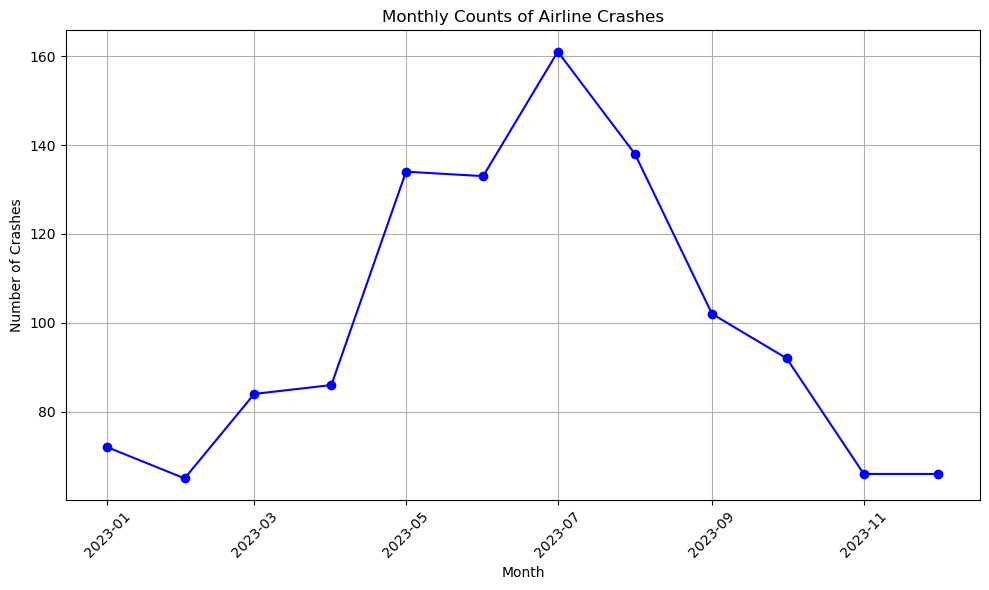

In [44]:
def plot_monthly_crashes(df: pd.DataFrame):
    """
    Plots the time series of monthly airline crashes in the United States

    Args:
        df (pd.DataFrame): Source dataframe containing crash data with 'EventDate' column
    """
    try:
        # Converting the EventDate column to datetime to extract month and count the crashs
        df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')
        df['Month'] = df['EventDate'].dt.strftime('%B %Y')
        monthly_crashes = df.groupby('Month').size().reset_index(name='Number of Crashes')
        monthly_crashes['Month'] = pd.to_datetime(monthly_crashes['Month'], format='%B %Y')
        monthly_crashes = monthly_crashes.sort_values('Month')

        # Plotting the data
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_crashes['Month'], monthly_crashes['Number of Crashes'], marker='o', linestyle='-', color='blue')
        plt.title('Monthly Counts of Airline Crashes')
        plt.xlabel('Month')
        plt.ylabel('Number of Crashes')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()
    except Exception as E:
        print(f"[Error] plot_monthly_crashes : Error plotting monthly crashes. {E}")

# Calling the function
plot_monthly_crashes(df.crash_data)

-  The number of airline crashes peaks during the summer months, particularly in July 2023, indicating a possible correlation with increased flight activity or seasonal weather conditions.
- After the peak in July, the number of crashes decreases sharply, with the lowest counts observed in November, indicating a reduction in risk factors or flight activity towards the year's end due to severe weather conditions or people's decreasing interest in travel.

- The data suggests a need for enhanced safety measures and operational adjustments during the summer months to mitigate the higher risk of crashes during this period.  

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\3296323660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['EventDate'].dt.strftime('%B')


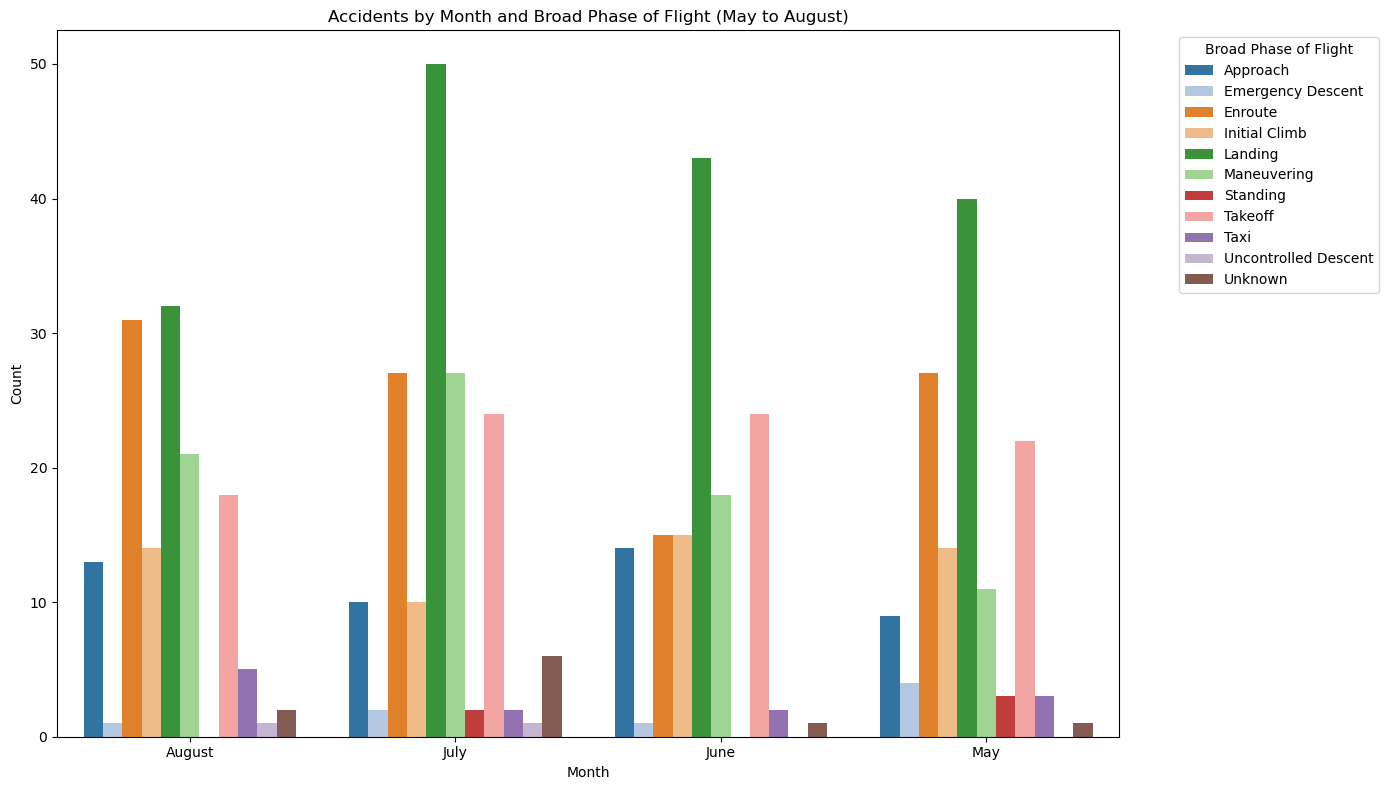

In [45]:
def plot_accidents_by_month_and_phase(df: pd.DataFrame):
    """
    Plots the number of accidents by month and broad phase of flight for the months May to August.

    Args:
        df (pd.DataFrame): Source dataframe containing crash data with 'EventDate' and 'BroadPhaseofFlight' columns
    """
    try:

        # Filtering 5,6,7,8 month
        filtered_df = df[df['EventDate'].dt.month.isin([5, 6, 7, 8])]
        filtered_df['Month'] = filtered_df['EventDate'].dt.strftime('%B')

        # Plotting the data
        plt.figure(figsize=(14, 8))
        sns.countplot(data=filtered_df, x='Month', hue='BroadPhaseofFlight', palette='tab20')

        plt.title('Accidents by Month and Broad Phase of Flight (May to August)')
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.legend(title='Broad Phase of Flight', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        plt.show()
    except Exception as E:
        print(f"[Error] plot_accidents_by_month_and_phase : Error plotting accidents. {E}")

#Calling the function
plot_accidents_by_month_and_phase(df.crash_data)

As the number of malfunctions and crashes are high in May, June, July, and August. Investigating what type of broad phases contributed the most
- July, June, and May have Landing as the most common phase of malfunctions and the next is and Enroute.(Enroute refers to the phase of flight when it is in cruise mode)
- In August the number of malfunctions in Landing and Enroute are very similar in number.

- Enhance operational preparedness and resource allocation for the summer months, ensuring that all flight phases receive adequate attention to mitigate risks effectively.
- Implement targeted safety measures and training programs for "Enroute" and "Landing" phases, particularly during the high-risk months of July and August.

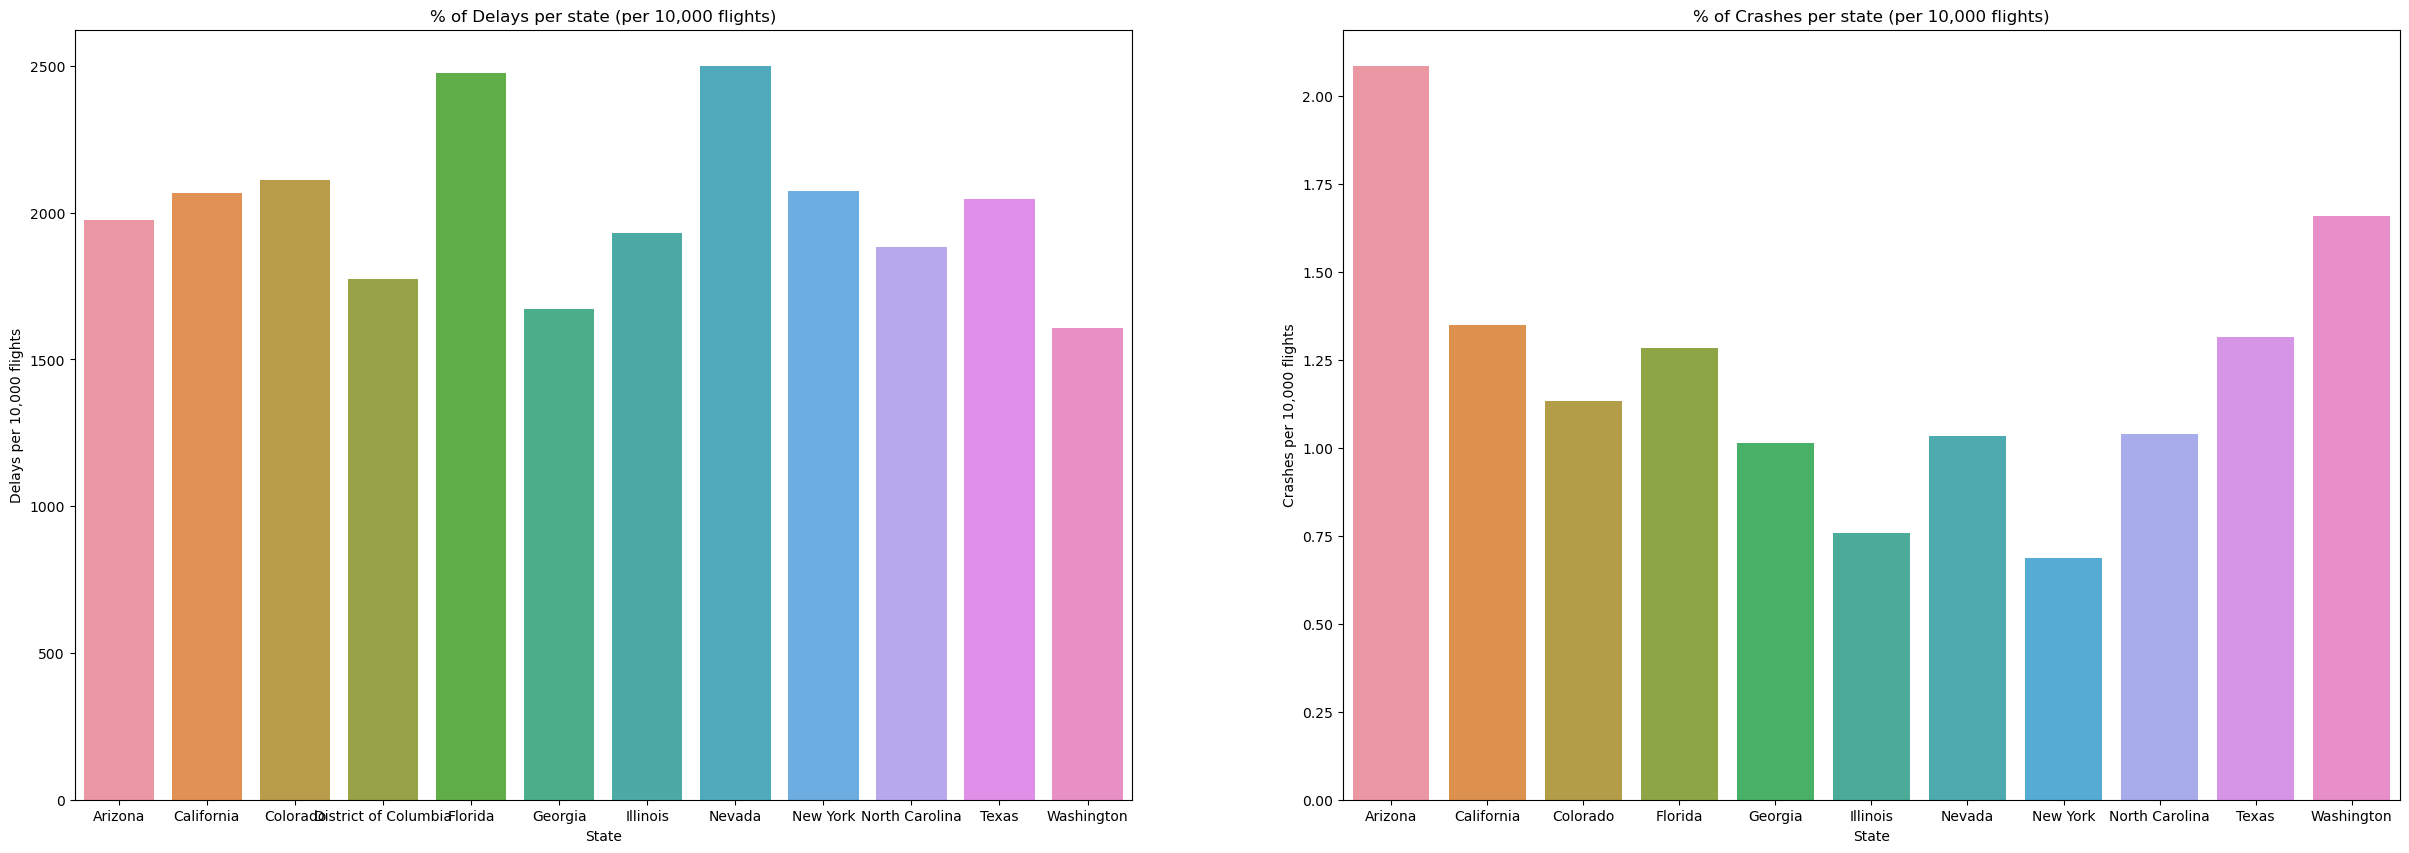

In [46]:
top_states = df.delay.groupby('state')['arr_flights'].sum().reset_index(name="flights").sort_values(by='flights', ascending=False).query('flights >= 200000')['state'].values.tolist()
top_states_df = df.delay.loc[df.delay['state'].isin(top_states)]

# Calculate the proportion and then get to whole numbers by multiplying by 100
delays_proportion_by_state = ((top_states_df.groupby('state')['arr_del15'].sum() / top_states_df.groupby('state')['arr_flights'].sum()) * 10000).reset_index(name='delays')
crashes_proportion_by_state = ((df.crash_data.groupby('State').size() / df.delay.groupby('state')['arr_flights'].sum()) * 10000).dropna().reset_index(name="crashes")
crashes_proportion_by_state = crashes_proportion_by_state.loc[crashes_proportion_by_state['index'].isin(top_states)]

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
_ = sns.barplot(data=delays_proportion_by_state, x='state', y='delays', ax=axes[0])
axes[0].set_title('% of Delays per state (per 10,000 flights)')
axes[0].set_ylabel('Delays per 10,000 flights')
axes[0].set_xlabel('State')

_ = sns.barplot(data=crashes_proportion_by_state, x='index', y='crashes', ax=axes[1])
axes[1].set_title('% of Crashes per state (per 10,000 flights)')
axes[1].set_ylabel('Crashes per 10,000 flights')
axes[1].set_xlabel('State')

plt.show()

This shows the percentage of delays and crashes per 10,000 flights across various states. Notably, Nevada has the highest percentage of delays per 10,000 flights, while Arizona leads in crashes per 10,000 flights, indicating potential issues that may need further investigation in these states.

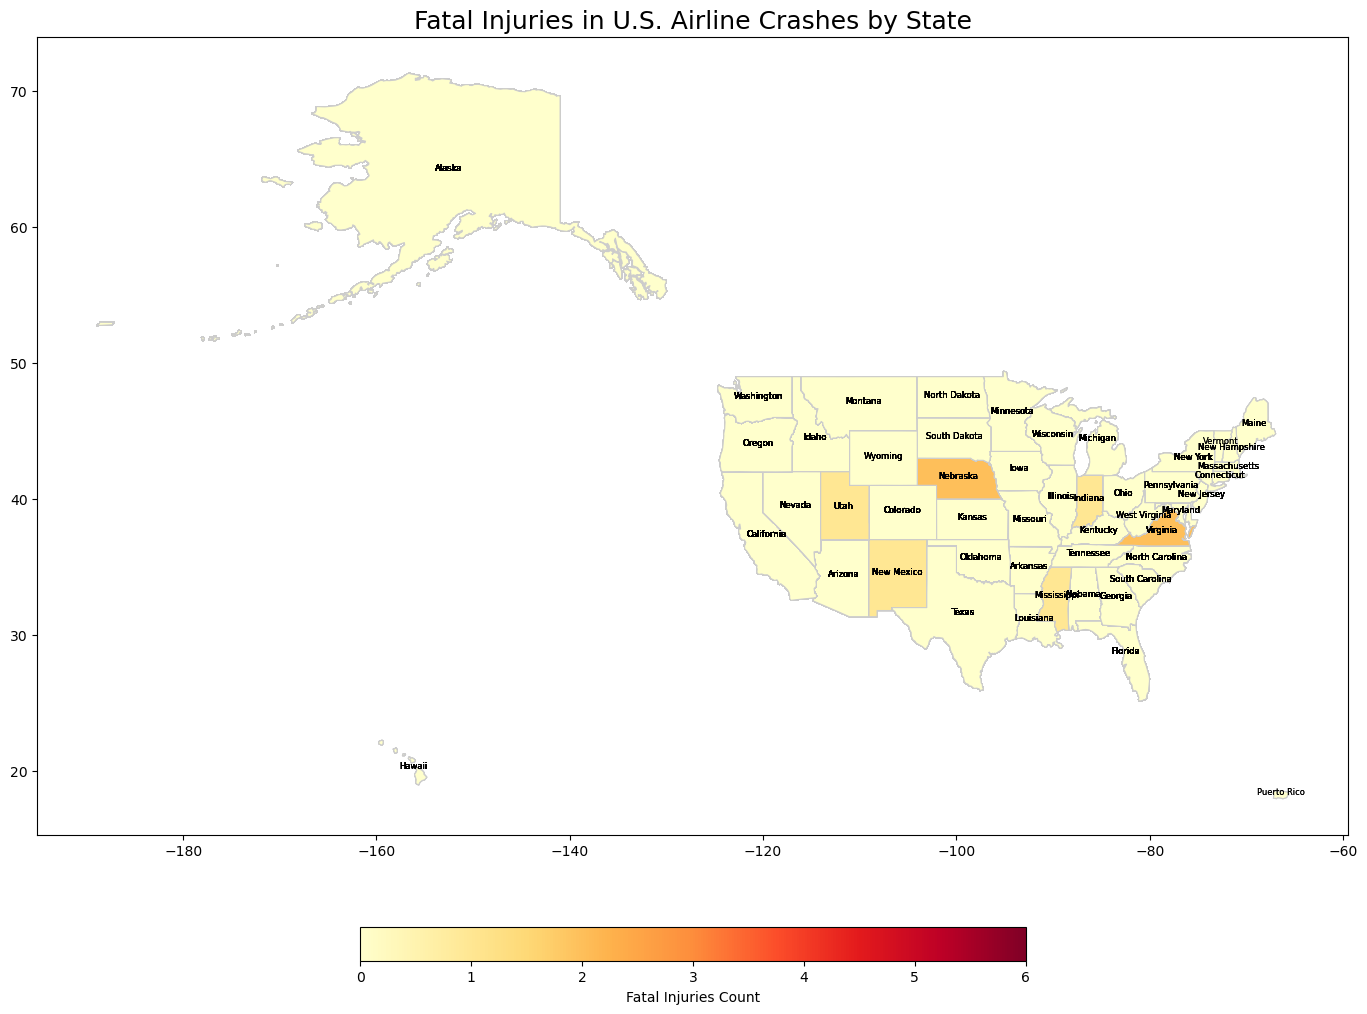

In [47]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Load the U.S. state map
us_map = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Merge the crash data with the state map
merged_data = pd.merge(us_map, df.crash_data, left_on='name', right_on='State', how='inner')

# Create a choropleth map
fig, ax = plt.subplots(figsize=(20, 12))
cmap = plt.get_cmap('YlOrRd')
norm = colors.Normalize(vmin=merged_data['FatalInjuryCount'].min(), vmax=merged_data['FatalInjuryCount'].max())
sm = cmx.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

merged_data.plot(column='FatalInjuryCount', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add state labels
for idx, row in merged_data.iterrows():
    plt.annotate(text=row['name'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=6, color='black')

# Add the color bar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1)
cbar.set_label('Fatal Injuries Count')

# Set the title and show the plot
plt.title('Fatal Injuries in U.S. Airline Crashes by State', fontsize=18)
plt.show()


The map visualizes the distribution of fatal injuries in U.S. airline crashes by state, with a color gradient indicating the count of fatalities. Nebraska shows the highest count of fatal injuries, while many states, especially in the central and western regions, have relatively low counts or none.

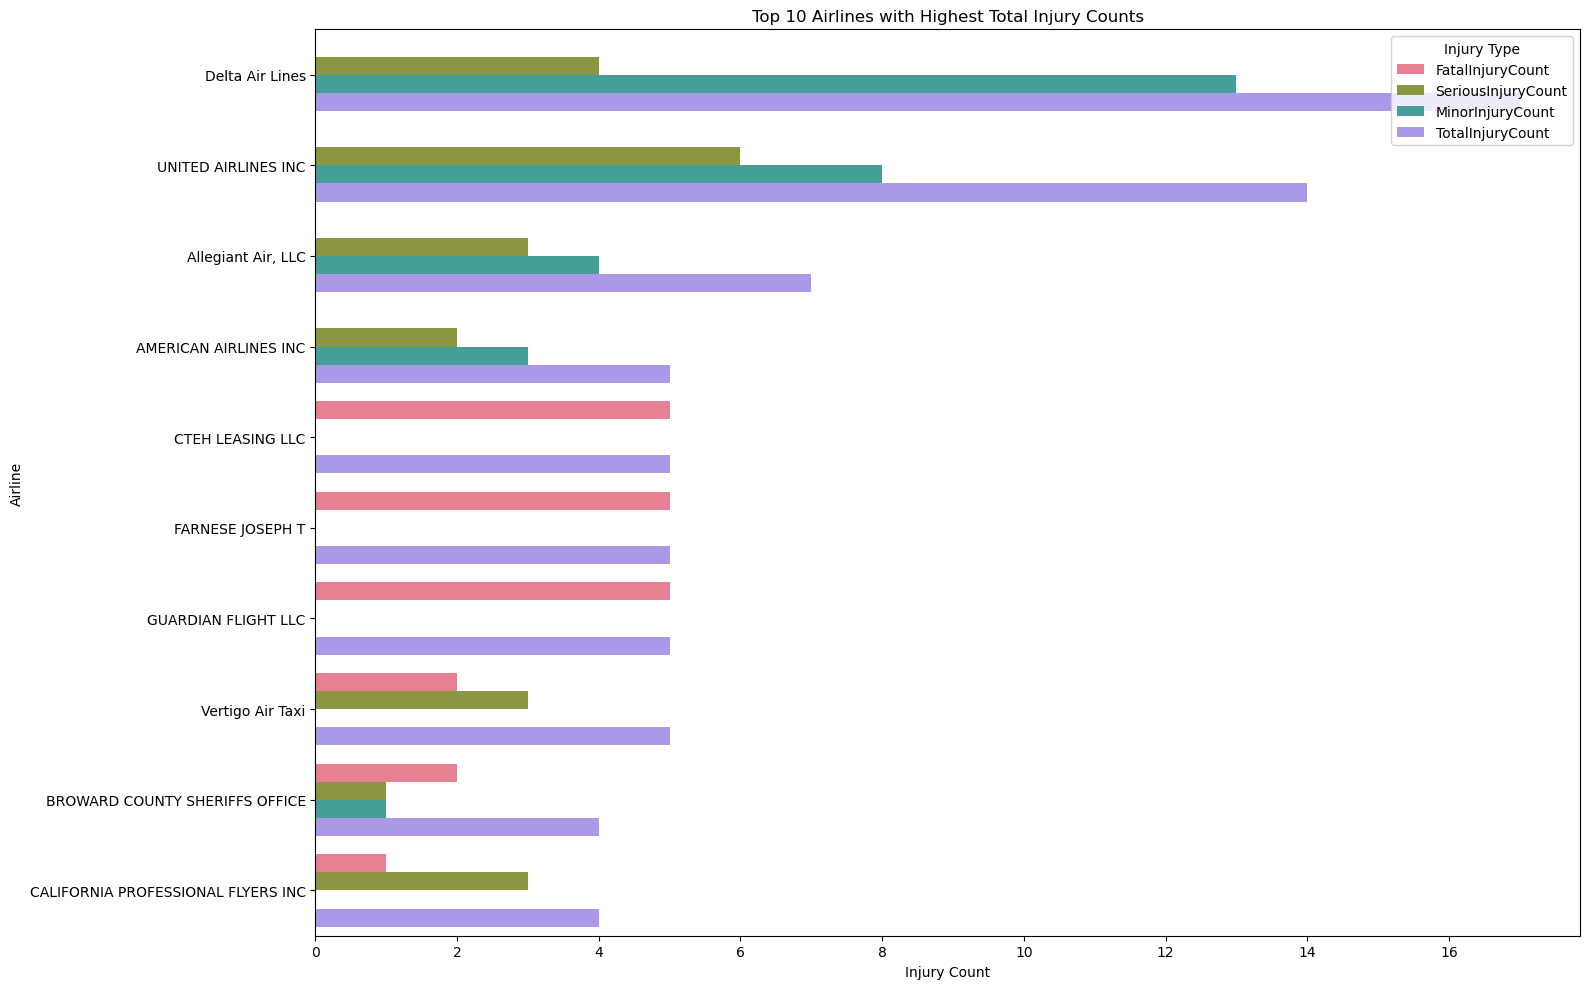

In [48]:
def plot_top_airlines_with_injuries(crash_data: pd.DataFrame):
    """
    Group by airline and aggregate injury counts, select the top 10 airlines with the highest total injury count,
    and plot the results with a husl color palette.

    Args:
        crash_data (pd.DataFrame): Dataframe containing crash data with 'Operator', 'FatalInjuryCount',
                                   'SeriousInjuryCount', and 'MinorInjuryCount' columns.
    """
    try:
        # Grouping by airline and aggregate injury counts
        airline_injury_stats = crash_data.query("Operator != 'UNKNOWN'").groupby('Operator').agg({
            'FatalInjuryCount': 'sum',
            'SeriousInjuryCount': 'sum',
            'MinorInjuryCount': 'sum'
        }).reset_index()

        # Calculating total injury count
        airline_injury_stats['TotalInjuryCount'] = airline_injury_stats[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum(axis=1)

        top_10_airlines_injuries = airline_injury_stats.nlargest(10, 'TotalInjuryCount')

        # Melting the DataFrame to long format for easier plotting
        top_10_airlines_injuries_melted = top_10_airlines_injuries.melt(id_vars=['Operator'], var_name='Injury Type', value_name='Count')

        # Plotting the graph
        plt.figure(figsize=(16, 10))
        sns.barplot(x='Count', y='Operator', hue='Injury Type', data=top_10_airlines_injuries_melted, palette='husl')
        plt.xlabel('Injury Count')
        plt.ylabel('Airline')
        plt.title('Top 10 Airlines with Highest Total Injury Counts')
        plt.legend(title='Injury Type', loc='upper right')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[Error] plot_top_airlines_with_injuries: {e}")

#Calling the function
plot_top_airlines_with_injuries(df.crash_data)

The bar chart displays the top 10 airlines with the highest total injury counts, broken down by injury type: fatal, serious, minor, and total injuries. United Airlines Inc. has the highest total injury count, while other airlines like Allegiant Air, LLC, and Delta Air Lines also show significant injury counts across various categories.

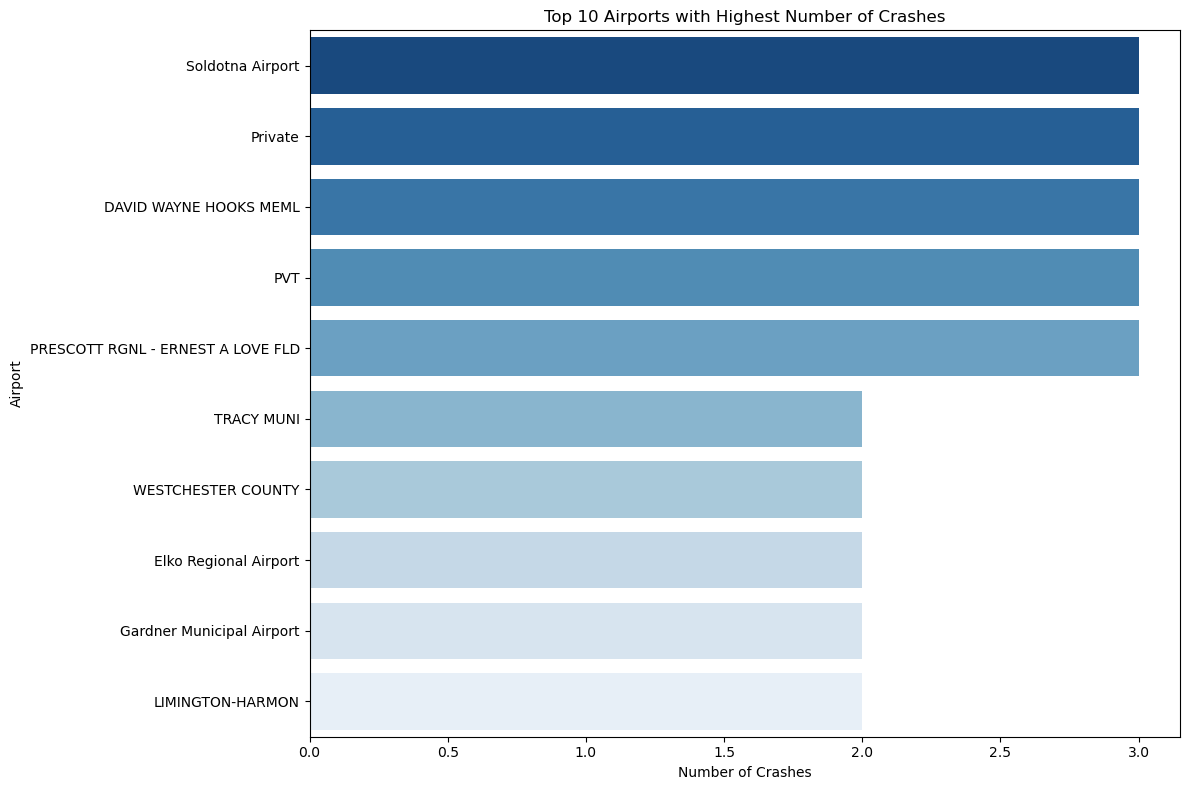

In [49]:
def plot_top_airports_with_crashes(crash_data: pd.DataFrame):
    """
    Count crashes by airport, select the top 10 airports with the highest number of crashes,
    and plot the results with a custom color palette.

    Args:
        crash_data (pd.DataFrame): Dataframe containing crash data with 'AirportName' column.
    """
    try:
        # Counting crashes by airport
        crash_counts = crash_data.query('AirportName != "Unknown"')['AirportName'].value_counts().reset_index()
        crash_counts.columns = ['AirportName', 'CrashCount']

        # Selecting the top 10 airports with the highest number of crashes
        top_airports_crashes = crash_counts.nlargest(10, 'CrashCount')

        custom_palette = sns.color_palette("Blues_r", n_colors=10)

        # Plot
        plt.figure(figsize=(12, 8))
        sns.barplot(x='CrashCount', y='AirportName', data=top_airports_crashes, palette=custom_palette)
        plt.xlabel('Number of Crashes')
        plt.ylabel('Airport')
        plt.title('Top 10 Airports with Highest Number of Crashes')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[Error] plot_top_airports_with_crashes: {e}")

#calling the function
plot_top_airports_with_crashes(df.crash_data)

The bar chart illustrates the top 10 airports with the highest number of crashes. Soldotna Airport is shown to have the highest number of crashes, followed closely by private airports and David Wayne Hooks Memorial Airport. The number of crashes for each airport is indicated on the x-axis, with all values falling between 0 and 3, highlighting that Soldotna Airport leads with close to 3 crashes. The varying shades of blue help differentiate between the airports, with darker shades representing airports with a higher number of crashes.

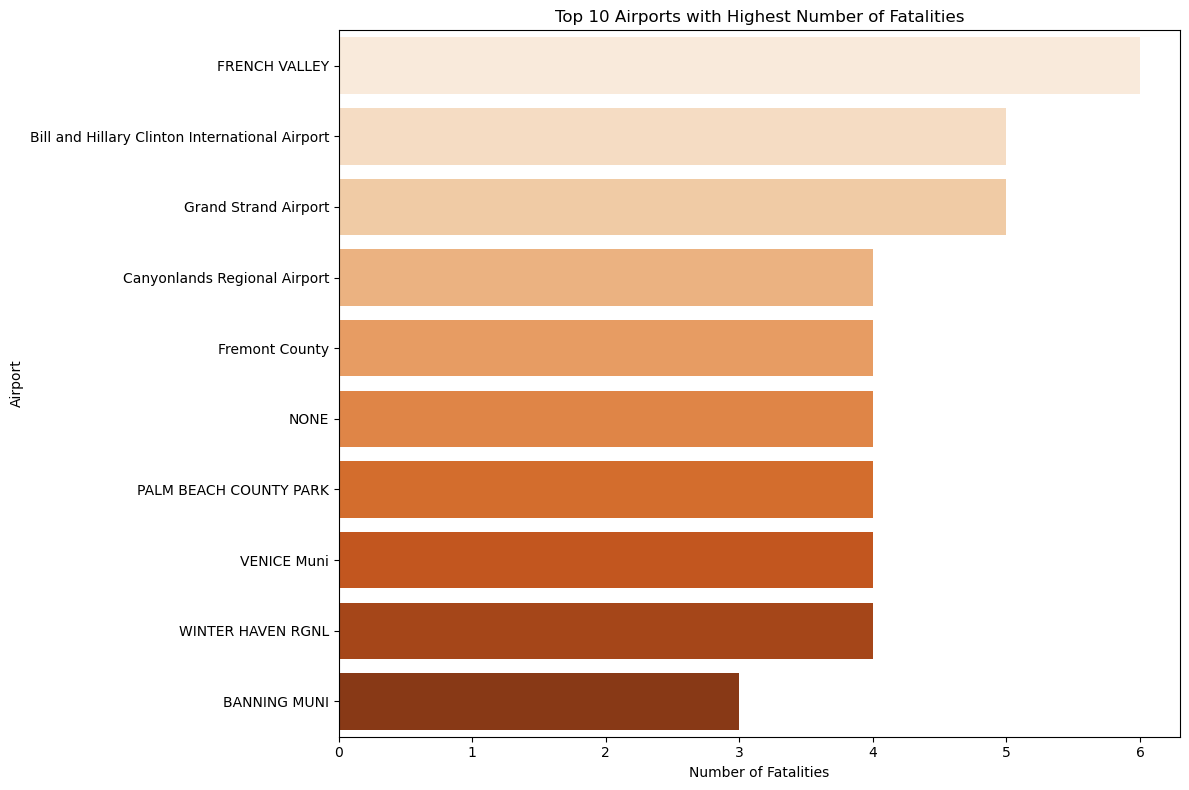

In [50]:
def plot_top_airports_with_fatalities(crash_data: pd.DataFrame):
    """
    Aggregate fatalities by airport, select the top 10 airports with the highest number of fatalities,
    and plot the results.

    Args:
        crash_data (pd.DataFrame): Dataframe containing crash data with 'AirportName' and 'FatalInjuryCount' columns.
    """
    try:
        # Aggregate fatalities by airport
        fatalities_counts = crash_data.query('AirportName != "Unknown"').groupby('AirportName')['FatalInjuryCount'].sum().reset_index()
        fatalities_counts.columns = ['AirportName', 'FatalitiesCount']

        # Select the top 10 airports with the highest number of fatalities
        top_airports_fatalities = fatalities_counts.nlargest(10, 'FatalitiesCount')

        # Plotting graphs
        plt.figure(figsize=(12, 8))
        sns.barplot(x='FatalitiesCount', y='AirportName', data=top_airports_fatalities, palette='Oranges')
        plt.xlabel('Number of Fatalities')
        plt.ylabel('Airport')
        plt.title('Top 10 Airports with Highest Number of Fatalities')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[Error] plot_top_airports_with_fatalities: {e}")

# Calling the function
plot_top_airports_with_fatalities(df.crash_data)

The bar chart presents the top 10 airports with the highest number of fatalities from crashes. French Valley Airport leads with the highest count, followed by Bill and Hillary Clinton International Airport and Grand Strand Airport. The x-axis represents the number of fatalities, with values ranging from 0 to 6. The color gradient, from light to dark shades of orange, highlights the varying counts of fatalities, with darker shades indicating higher fatality counts.

#### Let's try to group airlines by delay and malfunction stats

In [51]:
def get_top_carriers_crash_data(df: pd.DataFrame, top_carriers:list[str]):
    """
    Get top carriers data

    Args:
        df (pd.DataFrame): source dataframe
        top_carriers (list): list of top carriers

    Returns:
        pd.DataFrame : filtered dataframe having top carriers
    """
    top_carrier_names =list(map(lambda x : x.split(' ')[0].lower(), top_carriers))
    top_carrier_mapping = {}
    for carrier in top_carriers:
        top_carrier_mapping[carrier.split(' ')[0].lower()] = carrier
    top_carrier_crash_data = df.loc[df['Operator'].apply(lambda op : op.split(' ')[0].lower() in top_carrier_names)]
    top_carrier_crash_data['Operator'] = top_carrier_crash_data['Operator'].astype(str)
    top_carrier_crash_data['carrier_name'] = top_carrier_crash_data['Operator'].apply(lambda x : top_carrier_mapping[x.split(' ')[0].lower()])
    return top_carrier_crash_data


In [52]:
top_carrier_crash_data=get_top_carriers_crash_data(df.crash_data, top_carriers)

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\254066021.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_carrier_crash_data['Operator'] = top_carrier_crash_data['Operator'].astype(str)
C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\254066021.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_carrier_crash_data['carrier_name'] = top_carrier_crash_data['Operator'].apply(lambda x : top_carrier_mapping[x.split(' ')[0].lower()])


In [53]:
top_carriers_crash_counts = top_carrier_crash_data.groupby(['carrier_name', 'Month', 'AirportID', 'State', 'City']).size().reset_index(name='incidents')

C:\Users\devdp\AppData\Local\Temp\ipykernel_7404\1807291889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_carriers_crash_counts = top_carrier_crash_data.groupby(['carrier_name', 'Month', 'AirportID', 'State', 'City']).size().reset_index(name='incidents')


#### Let's do PCA

In [54]:
from sklearn.decomposition import PCA

In [55]:
plt.figure(figsize=(10, 8))
crash_pca_df = top_carrier_crash_data.copy()
crash_pca_grouped_df=crash_pca_df.groupby('carrier_name').agg(
    FatalInjuryCount=('FatalInjuryCount', 'sum'),
    SeriousInjuryCount=('SeriousInjuryCount', 'sum'),
    MinorInjuryCount=('MinorInjuryCount', 'sum'),
    Incidents=('carrier_name', 'size')
).reset_index().sort_values(by='Incidents', ascending=False)

<Figure size 1000x800 with 0 Axes>

In [56]:
top_carriers_data.head()
delay_stats = top_carriers_data[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_on_time']].copy()
delay_stats['arr_punc'] = delay_stats['arr_on_time'] / delay_stats['arr_flights']
delay_stats.drop(columns=['arr_on_time', 'arr_del15'])

arr_flights  arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0               72              0             0        672             61   
1               62              0             0        348            252   
2               95              0             0        859            536   
3               23              1             0         75              9   
4             2111              1             0      21424           8906   
...            ...            ...           ...        ...            ...   
22555          279              3             0       1775            258   
22556          177              4             0       1600            458   
22557            6              0             0          0              0   
22558           53              0             0       1347             79   
22559           82              1             0        771            101   

       weather_delay  nas_delay  security_delay  late_aircraft_delay  arr_punc  
0                574         20               0                   17  0.930556  
1                  0         33               0                   63  0.887097  
2                  0         47               0                  276  0.894737  
3                  0          0               0                   66  0.869565  
4                732       1487               0                10299  0.878257  
...              ...        ...             ...                  ...       ...  
22555              0        704               0                  813  0.878136  
22556            134        369               0                  639  0.807910  
22557              0          0               0                    0  1.000000  
22558             50        292               0                  926  0.716981  
22559              0        272               0                  398  0.829268  

[16888 rows x 10 columns]

In [57]:

delay_stats = top_carriers_data[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_on_time']].copy()
# let's create airline punctuality column
delay_stats['arr_punc'] = delay_stats['arr_on_time'] / delay_stats['arr_flights']
delay_stats['arr_punc'] = delay_stats['arr_on_time'] / delay_stats['arr_delay']
delay_stats.drop(columns=['arr_on_time', 'arr_del15'])

arr_flights  arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
0               72              0             0        672             61   
1               62              0             0        348            252   
2               95              0             0        859            536   
3               23              1             0         75              9   
4             2111              1             0      21424           8906   
...            ...            ...           ...        ...            ...   
22555          279              3             0       1775            258   
22556          177              4             0       1600            458   
22557            6              0             0          0              0   
22558           53              0             0       1347             79   
22559           82              1             0        771            101   

       weather_delay  nas_delay  security_delay  late_aircraft_delay  arr_punc  
0                574         20               0                   17  0.099702  
1                  0         33               0                   63  0.158046  
2                  0         47               0                  276  0.098952  
3                  0          0               0                   66  0.266667  
4                732       1487               0                10299  0.086538  
...              ...        ...             ...                  ...       ...  
22555              0        704               0                  813  0.138028  
22556            134        369               0                  639  0.089375  
22557              0          0               0                    0       inf  
22558             50        292               0                  926  0.028211  
22559              0        272               0                  398  0.088197  

[16888 rows x 10 columns]

In [58]:
top_carriers_grouped_data = top_carriers_data.groupby('carrier_name')[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_on_time']].sum().reset_index()

delay_stats = top_carriers_grouped_data[['carrier_name','arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_on_time']].copy()
delay_stats['arr_punc'] = delay_stats['arr_on_time'] / delay_stats['arr_flights']
delay_stats[['carrier_delay', 'weather_delay', 'nas_delay',	'security_delay',	'late_aircraft_delay']] = delay_stats[['carrier_delay', 'weather_delay', 'nas_delay',	'security_delay',	'late_aircraft_delay']].div(delay_stats['arr_delay'], axis=0)
delay_stats.drop(columns=['arr_on_time', 'arr_del15'])
delay_stats.dropna(inplace=True)

# Let's scale columns using standard scaler

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
delay_stats.iloc[:,1:] = pd.DataFrame(scaler.fit_transform(delay_stats.iloc[:,1:]))
delay_stats.head()

carrier_name  arr_flights  arr_del15  arr_cancelled  \
0    Alaska Airlines Network    -0.684765  -0.680580      -1.250314   
1  American Airlines Network     1.102536   1.364598       0.912805   
2    Delta Air Lines Network     1.216828   0.692810       0.923079   
3          Endeavor Air Inc.    -0.797443  -0.929641      -0.640390   
4                  Envoy Air    -0.730629  -0.764466      -1.191917   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0     -0.593390  -0.912272      -0.385804      -0.514803   0.724971   
1      1.433857   2.153940       0.116887      -0.499801  -0.977055   
2      0.911878   0.821141       1.824552      -0.285696  -0.538988   
3     -0.995176  -0.969368      -0.222363       0.684244   0.391351   
4     -0.846367  -0.908999      -1.121252       1.120321   0.373865   

   security_delay  late_aircraft_delay  arr_on_time  arr_punc  
0        1.702708            -0.129316    -0.670833  0.289380  
1       -0.178411             1.034923     1.020830 -0.304495  
2       -0.622738            -1.173638     1.344903  0.814158  
3       -0.803328            -0.423388    -0.753889  1.066669  
4       -0.108194             0.286443    -0.706728  0.522379

In [60]:
final_df = crash_pca_grouped_df.merge(delay_stats, on='carrier_name', how="inner")
pca = PCA(n_components=2)
final_df[['PC1', 'PC2']] = pd.DataFrame(pca.fit_transform(final_df.iloc[:,1:]))


### Let's cluster PC values for top airline to check which airlines are similar in terms of delays and crashes/malfuncations.

C:\Users\devdp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\devdp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


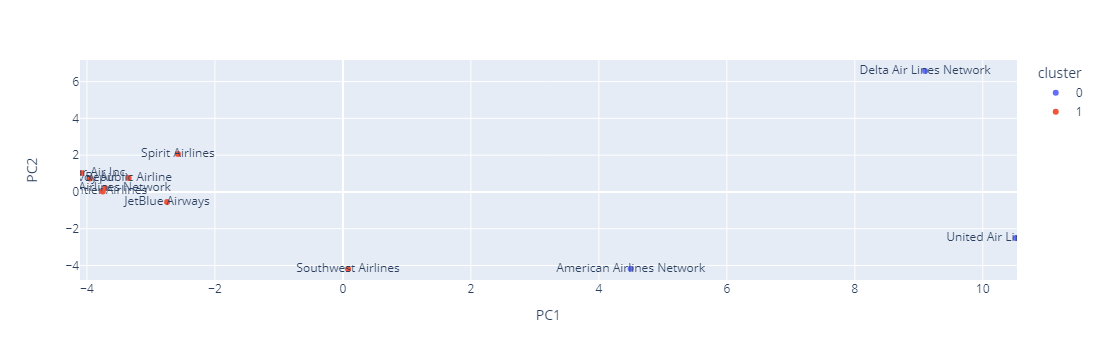

In [61]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(final_df[['PC1', 'PC2']])
final_df['cluster'] = pd.Categorical(km.labels_)
fig = px.scatter(final_df, x='PC1', y='PC2', color="cluster", text='carrier_name' )
fig.update_layout(scattermode="group")
fig.show()

From above graph we can check that American, Delta and United airlines are kind of similar in terms of performance, and as we already checked that delay and crash/malfunction rates are low for these airlines this group can be considered as reliable airline group.

Other airlines can be grouped into a new group that can be considered as not so efficient airlines.

Note: Southwest airlines however looks different than other airlines in similar group